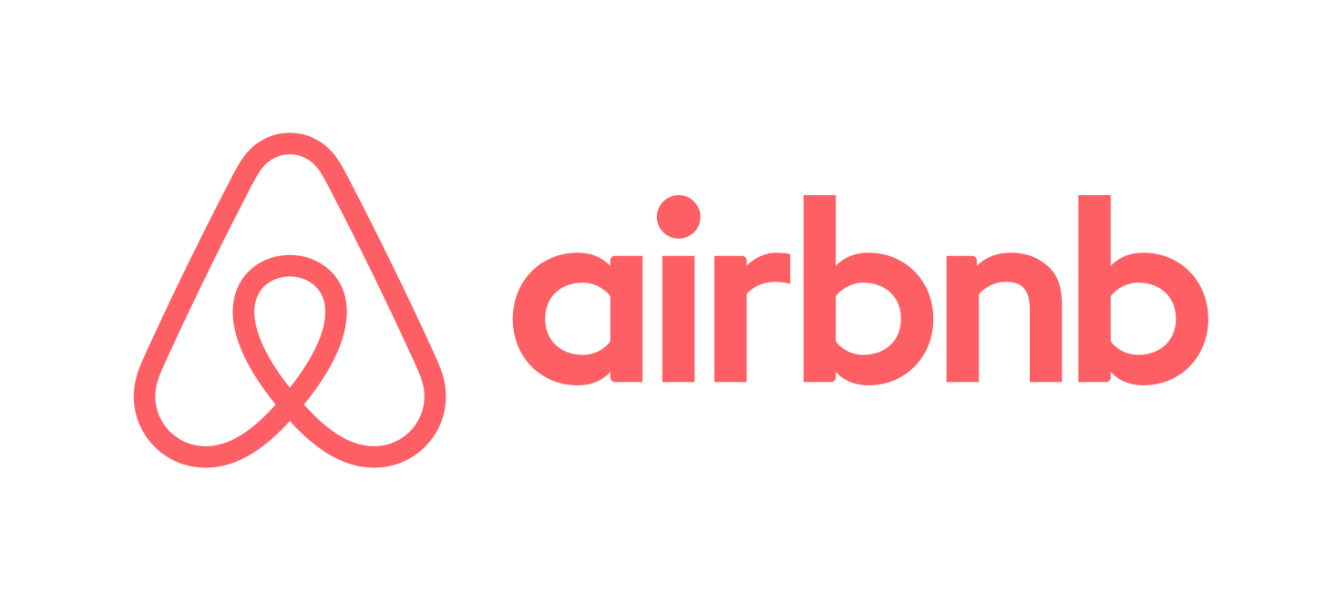

## MSCA 37014- Python for Analytics 

### Airbnb Project

Airbnb is interested in better understanding data relating to price of listings on their website. They want to gain insight into its usefulness in the listing assessment process. The dataset consists of a random sample of homes that have been booked in Amsterdam during December 2020.

In [1]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rc('figure', figsize=(10,5))
figsize_with_subplots = (10,10)
bin_size=10

In [2]:
df = pd.read_csv('listings.csv.gz')

## Exploratory Data Analysis

Three main components of exploring data:
1. Understanding variables 
2. Cleaning your dataset
3. Analyzing relationships between variables

In [3]:
df.shape

(16116, 74)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210907032724,2021-09-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Single level home"", ""Coffee maker"", ""Long te...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,3,28,55,124,2021-09-07,280,2,0,2013-08-25,2019-11-21,4.89,4.93,5.00,4.97,4.97,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.86
1,20168,https://www.airbnb.com/rooms/20168,20210907032724,2021-09-07,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2021-09-07,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.64
2,25428,https://www.airbnb.com/rooms/25428,20210907032724,2021-09-07,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",NaN,NaN,0%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37490,4.88487,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Cable TV

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16116 non-null  int64  
 1   listing_url                                   16116 non-null  object 
 2   scrape_id                                     16116 non-null  int64  
 3   last_scraped                                  16116 non-null  object 
 4   name                                          16086 non-null  object 
 5   description                                   15893 non-null  object 
 6   neighborhood_overview                         10405 non-null  object 
 7   picture_url                                   16116 non-null  object 
 8   host_id                                       16116 non-null  int64  
 9   host_url                                      16116 non-null 

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.611600e+04,1.611600e+04,1.611600e+04,16111.000000,16111.000000,0.0,16116.000000,16116.000000,16116.000000,0.0,15218.000000,16019.000000,16116.000000,16116.000000,16113.000000,16113.000000,16113.000000,1.611300e+04,16113.000000,1.611300e+04,0.0,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000,13815.000000,13816.000000,13807.000000,13812.000000,13807.000000,13807.000000,16116.000000,16116.000000,16116.000000,16116.000000,14029.000000
mean,2.118184e+07,2.021091e+13,6.976052e+07,2.023338,2.023338,NaN,52.365510,4.889434,2.836684,NaN,1.530096,1.758100,3.991189,608.146811,3.953578,4.149134,685.520449,2.672465e+05,4.025489,2.666400e+05,NaN,4.026309,8.839787,14.321730,55.316890,24.645383,1.386262,0.325453,4.691878,4.811200,4.701267,4.847800,4.868875,4.728831,4.600638,1.636883,1.096674,0.489514,0.008067,0.677467
std,1.352063e+07,1.683646e+00,9.027164e+07,23.344729,23.344729,NaN,0.016563,0.036151,1.312016,NaN,0.951085,1.467627,20.987452,540.665822,20.988709,21.034236,532.480917,2.392451e+07,20.996160,2.387038e+07,NaN,8.702405,18.140200,28.508009,107.907731,56.707709,7.477153,2.025282,0.668502,0.345724,0.440648,0.307706,0.299283,0.328007,0.390520,2.402076,1.870279,1.531128,0.134829,1.720379
min,2.818000e+03,2.021091e+13,3.159000e+03,0.000000,0.000000,NaN,52.290340,4.755710,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.018020e+07,2.021091e+13,9.735558e+06,1.000000,1.000000,NaN,52.355130,4.863690,2.000000,NaN,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,28.000000,2.800000e+01,2.000000,2.800000e+01,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.670000,4.750000,4.600000,4.820000,4.850000,4.600000,4.500000,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.926593e+07,2.021091e+13,2.974134e+07,1.000000,1.000000,NaN,52.364880,4.886900,2.000000,NaN,1.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,4.860000,4.910000,4.830000,4.950000,4.980000,4.810000,4.670000,1.000000,1.000000,0.000000,0.000000,0.270000
75%,3.107548e+07,2.021091e+13,8.988321e+07,1.000000,1.000000,NaN,52.375440,4.909160,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,2.000000,5.000000,47.000000,22.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,0.000000,0.000000,0.620000
max,5.208280e+07,2.021091e+13,4.210037e+08,1992.000000,1992.000000,NaN,52.425340,5.066508,16.000000,NaN,50.000000,33.000000,1100.000000,1825.000000,1100.000000,1100.000000,1825.000000,2.147484e+09,1100.000000,2.142625e+09,NaN,30.000000,60.000000,90.000000,365.000000,877.000000,422.000000,137.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,30.000000,21.000000,4.000000,107.840000


Some quick observations:

- host_listings count is highly sqewed. Probably an outlier in there. The max is 1992 when 75% of the data is 1. 
- Same with host_total_listings_count 
- neihbourhood_group_cleansed has no values 
- accomodates also seems to have a few really large values.
- bathrooms has no values
- bedroom seems to have an outlier. the max bedroom is 50. Same with beds (33), min_nights (1100), max_nights (1825), min_min_nights (1100), max_min_nights (1100), min_max_nights (1825), min_nights_avg_ntm (1100) 
- Not sure what the column max_max_nights represents. Shows really large values. 
- calendar_updated has no values 
- availability also seems to be highly skewed
- no of reviews alos seems to be highly skewed

In [19]:
# separating the catgorical and numerical variables 
# Not including url columns in categorical and id cols in numerical
cat_cols = []
num_cols = []
extra = []

for i in df.columns:
    if (df[i].dtype == 'object') & ('url' not in i):
        cat_cols.append(i)
    elif (df[i].dtype != 'object') & ('_id' not in i):
        num_cols.append(i)
    else:
        extra.append(i)

In [22]:
%pprint = False
cat_cols

Pretty printing has been turned OFF


['last_scraped', 'name', 'description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']

In [23]:
num_cols

['id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [24]:
extra

['listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url']

In [27]:
# Looking at what unique values each categorical colum has 

for col in df.columns.values:
    if col in cat_cols:
        print(df[col].value_counts(normalize=True).round(decimals=4))
        print('\n')

2021-09-07    0.821
2021-09-08    0.179
Name: last_scraped, dtype: float64


Amsterdam                                             0.0018
Residences | 2-Bedrooms | Serviced Apartment          0.0008
Lovely apartment near Vondelpark                      0.0004
Spacious apartment near Vondelpark                    0.0004
Amsterdam Appartement                                 0.0003
                                                       ...  
A room with a canalview - Jordaan, Amsterdam          0.0001
Guesthouse Canal Pride, fijn logeren aan de gracht    0.0001
Unique studio in houseboat in the urban greenery      0.0001
Sun-Room-Shine                                        0.0001
Private guestfloor with roofterrace                   0.0001
Name: name, Length: 15766, dtype: float64


Hotel Jansen is a new Short Stay hotel in Amsterdam. We offer great and affordable accommodation for students, graduates, interns & young professionals from all over the world. Hotel Jansen is a place you can

Looking at the categorical variables:

- host_response_time: {within an hour, within a day, within a few hours, a few days or more}
- host_response_rate, host_acceptance_rate: should be a numerical data point 
- host_is_superhost: can be turned to 1,0 {13% are superhost}
- host_neighbourhoods: there are 68 different neighborhoods. Maybe there is a way to group some?
- host_verifications: a list of different ways to verify. We can maybe split it into columns of 1 and 0?
- host_has_profile_pic: 1,0 columns {99.8% have a profile pic}
- host_identity_verified: 1,0 column {67% have been verified} 
- neighbourhood: seems redundant 
- property_type: 67 different values. Maybe group them somehow?
- room_type: {Entire home/apt, Private room, Hotel room, Shared room}
- bathroom_text: should be a numerical value 
- amenities: split them and group them into smaller categories?
- price: should be a numerical column 
- has_availability: 1,0 column {96% have availability}
- instant_bookable: 1,0 column {77% are not instantly bookable}